In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [4]:
df = pd.read_csv('/content/productdata.xlsx - Sheet1.csv')
df.head()

,PRODUCTID,TITLE,BULLET_POINTS,DESCRIPTION,PRODUCTTYPEID,ProductLength
0,1925202,ArtzFolio Tulip Flowers Blackout Curtain for D...,[LUXURIOUS & APPEALING: Beautiful custom-made ...,NaN,1650.0,2125.980000
1,2673191,Marks & Spencer Girls' Pyjama Sets T86_2561C_N...,"[Harry Potter Hedwig Pyjamas (6-16 Yrs),100% c...",NaN,2755.0,393.700000
2,2765088,PRIKNIK Horn Red Electric Air Horn Compressor ...,"[Loud Dual Tone Trumpet Horn, Compatible With ...","Specifications: Color: Red, Material: Aluminiu...",7537.0,748.031495
3,1594019,ALISHAH Women's Cotton Ankle Length Leggings C...,[Made By 95%cotton and 5% Lycra which gives yo...,AISHAH Women's Lycra Cotton Ankel Leggings. Br...,2996.0,787.401574
4,283658,The United Empire Loyalists: A Chronicle of th...,NaN,NaN,6112.0,598.424000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3847 entries, 0 to 3846
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRODUCTID      3847 non-null   int64  
 1   TITLE          3847 non-null   object 
 2   BULLET_POINTS  2256 non-null   object 
 3   DESCRIPTION    1703 non-null   object 
 4   PRODUCTTYPEID  3669 non-null   float64
 5   ProductLength  3669 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 180.5+ KB


In [ ]:
df.duplicated().sum()


np.int64(217)

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.isnull().sum()

,0
PRODUCTID,0
TITLE,0
BULLET_POINTS,1452
DESCRIPTION,1985
PRODUCTTYPEID,89
ProductLength,89


In [ ]:
df['ProductLength'].isnull().mean() * 100
df['PRODUCTTYPEID'].isnull().mean() * 100

np.float64(2.451790633608815)

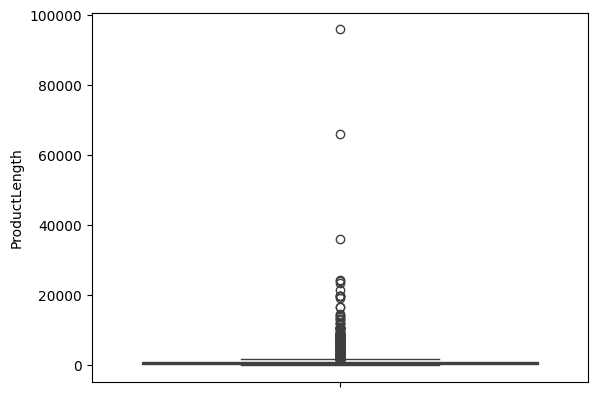

In [ ]:
sns.boxplot(df['ProductLength'])
plt.show()

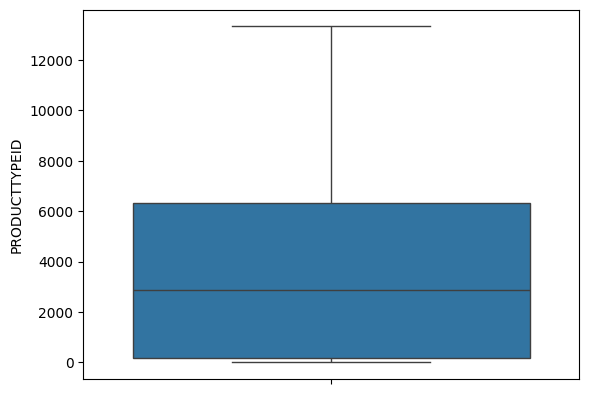

In [ ]:
sns.boxplot(df['PRODUCTTYPEID'])
plt.show()

In [ ]:
df['ProductLength'] = df['ProductLength'].fillna(df['ProductLength'].median())
df['PRODUCTTYPEID'] = df['PRODUCTTYPEID'].fillna(df['PRODUCTTYPEID'].median())


In [ ]:
df['BULLET_POINTS'] = df['BULLET_POINTS'].fillna('N/A')
df['DESCRIPTION'] = df['DESCRIPTION'].fillna('N/A')

In [ ]:
df.isnull().sum()

,0
PRODUCTID,0
TITLE,0
BULLET_POINTS,1452
DESCRIPTION,1985
PRODUCTTYPEID,0
ProductLength,0


In [ ]:
df.columns = df.columns.str.strip().str.lower()
df.rename(columns={
    'productid': 'product_id',
    'productlength': 'product_length',
    'producttypeid': 'product_type_id'
}, inplace=True)

In [ ]:
print(df.columns)


Index(['product_id', 'title', 'bullet_points', 'description',
       'product_type_id', 'product_length'],
      dtype='object')


In [ ]:
import re # Import the regular expression module

def clean_text(text):
    if isinstance(text, str):
        # Keep only letters, numbers, and spaces
        return re.sub(r'[^A-Za-z0-9\s]', '', text)
    return text

for col in df.select_dtypes(include=['object']):
    df[col] = df[col].apply(clean_text)

In [ ]:
import re

def extract_attributes(title):
    # Extracting relevant attributes such as quantity, size, and color
    quantity = re.search(r'\d+\s*PCS|Set of \d+', title, re.IGNORECASE)
    size = re.search(r'\d+-\d+Y', title)
    color = re.search(r'\b(?:Red|Blue|Black|White|Green|Navy|Pink|Yellow|Purple)\b', title, re.IGNORECASE)

    return {
        'quantity': quantity.group().strip() if quantity else None,
        'size': size.group().strip() if size else None,
        'color': color.group().strip().capitalize() if color else None
    }

def create_short_title(title, max_len=50):
    # Cleaning the title to remove special characters
    title = re.sub(r'[^A-Za-z0-9\s]', '', title)

    # Extract key attributes
    attrs = extract_attributes(title)

    # Focus on the first few words of the title (product name)
    words = title.split()
    short_title = ' '.join(words[:4])  # Base: first 4 words

    # Appending attributes, respecting max_len
    for attr in [attrs['quantity'], attrs['size'], attrs['color']]:
        if attr and len(short_title) + len(attr) + 3 <= max_len:
            short_title += f" - {attr}"

    # Removing unwanted words
    redundant_terms = ["womens", "mens", "set", "pack", "of", "and"]
    pattern = r'\b(?:' + '|'.join(redundant_terms) + r')\b'
    short_title = re.sub(pattern, '', short_title, flags=re.IGNORECASE)

    #  spacing and case
    short_title = re.sub(r'\s+', ' ', short_title).strip()
    short_title = short_title.title()  # or use .lower() if you prefer lowercase for SEO

    # Final trimming
    if len(short_title) > max_len:
        short_title = short_title[:max_len].rsplit(' ', 1)[0]

    return short_title
df['short_title'] = df['title'].apply(create_short_title)
print(df[['title', 'short_title']].head(20))


                                                title  \
0   ArtzFolio Tulip Flowers Blackout Curtain for D...   
1   Marks  Spencer Girls Pyjama Sets T862561CNavy ...   
2   PRIKNIK Horn Red Electric Air Horn Compressor ...   
3   ALISHAH Womens Cotton Ankle Length Leggings Co...   
4   The United Empire Loyalists A Chronicle of the...   
5   HINS Metal Bucket Shape Plant Pot for Indoor  ...   
6                        Ungifted My Life and Journey   
7   Delavala Self Adhesive Kitchen Backsplash Wall...   
8   PUMA Cali Sport Clean Womens Sneakers White Le...   
9   Hexwell Essential oil for Home Fragrance Oil A...   
10  3NH Glasses Goggles Anti Fog Antis Windproof A...   
11                            La Mure  Valbonnais gps   
12  Jecris des lettres premiers exercices dcriture...   
13  Mediterranean diet for beginners 7Benefits of ...   
14  SEGOVIA Single Walled Stainless Steel Sports f...   
15    Stone  Beam Fan Embossed Planter in Blue Medium   
16    Star Trek 50th Anniversar

In [ ]:
df.to_csv('cleaned_product_short_title.csv', index=False)

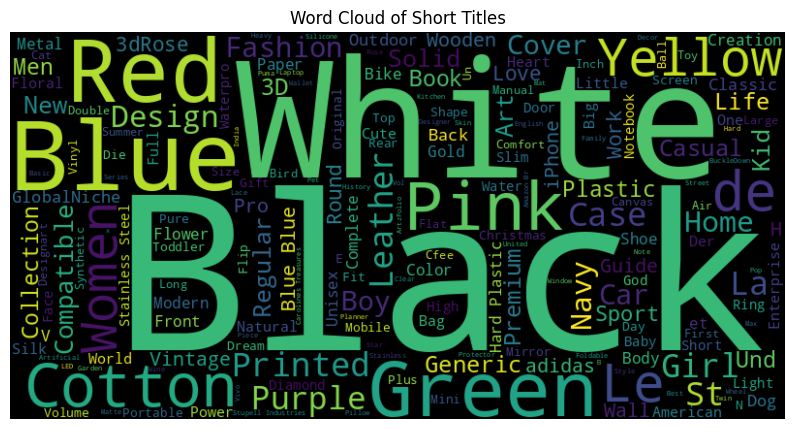

In [ ]:
#Word Cloud
from wordcloud import WordCloud

# A word cloud for the short titles
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['short_title']))
plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title("Word Cloud of Short Titles")
plt.show()